# **Description of (tf) functions appearing in CNN code**

In [2]:
import tensorflow as tf

## **tf.keras.layers.Flatten**

In [ ]:
# Set input
x = tf.constant([[0., 1., 2.],
                 [3., 4., 5.],
                 [6., 7., 8.]])
x = tf.reshape(x, [1, 3, 3, 1])

# Set Flatten
layer_flatten = tf.keras.layers.Flatten()

# Compute output
y = layer_flatten(x)

# Print output
print("x_shape:" + str(x.shape))
print("y_shape:" + str(y.shape))
print(y)

x_shape:(1, 3, 3, 1)
y_shape:(1, 9)
tf.Tensor([[0. 1. 2. 3. 4. 5. 6. 7. 8.]], shape=(1, 9), dtype=float32)


## **tf.keras.layers.Conv2D**

### Example 1

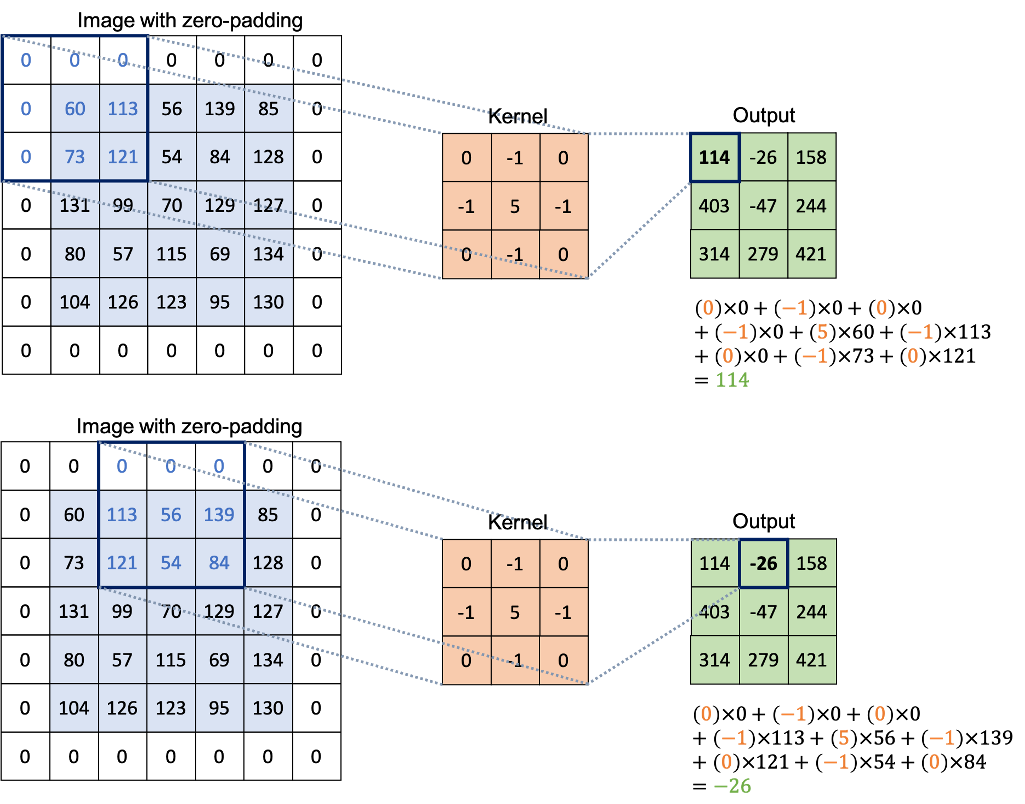

In [ ]:
# Set input
x = tf.constant([[60., 113., 56., 139., 85.],
                 [73., 121., 54., 84., 128.],
                 [131., 99., 70., 129., 127.],
                 [80., 57., 115., 69., 134.],
                 [104., 126., 123., 95., 130.]])
x = tf.reshape(x, [1, 5, 5, 1])

# Set Conv2D
def k_init(shape=None, dtype=None):
  k = tf.constant([[0., -1., 0.],
                   [-1., 5., -1.],
                   [0., -1., 0.]])
  k = tf.reshape(k, [3, 3, 1, 1])
  return k
layer_conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=(2, 2), kernel_initializer=k_init, padding="same")

# Compute output
y = layer_conv2d(x)

# Print output
print("x_shape:" + str(x.shape))
print("y_shape:" + str(y.shape))

y_print = tf.reshape(y, [3, 3])
y_print = y_print.numpy()
print("y_print:")
for row in range(0, 3):
  for col in range(0, 3):
    print("{:5.1f}  ".format(y_print[row, col]), end='')
  print("")

x_shape:(1, 5, 5, 1)
y_shape:(1, 3, 3, 1)
y_print:
114.0  -26.0  158.0  
403.0  -47.0  244.0  
314.0  279.0  421.0  


### Example 2

In [ ]:
# Set input
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)  # Create random tensor with specified shape

# Compute output
y = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=(2, 2), activation="relu")(x)

# Print output
print("x_shape:" + str(x.shape))
print("y_shape:" + str(y.shape))

x_shape:(4, 28, 28, 3)
y_shape:(4, 24, 24, 32)


## **tf.keras.layers.MaxPool2D**

### Example 1

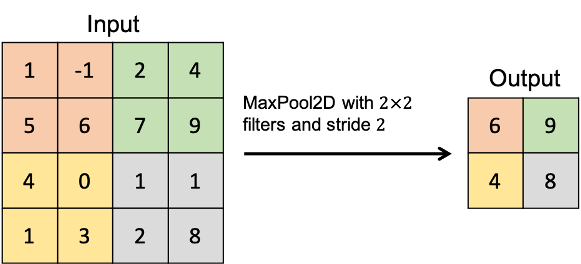

In [ ]:
# Set input
x = tf.constant([[1., -1., 2., 4.],
                 [5., 6., 7., 9.],
                 [4., 0., 1., 1.],
                 [1., 3., 2., 8.]])
x = tf.reshape(x, [1, 4, 4, 1])

# Set MaxPool2D
max_pool_2d = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

# Compute output
y = max_pool_2d(x)

# Print output
print("x_shape:" + str(x.shape))
print("y_shape:" + str(y.shape))

y_print = tf.reshape(y, [2, 2])
y_print = y_print.numpy()
print("y_print:")
for row in range(0, 2):
  for col in range(0, 2):
    print("{:5.1f}  ".format(y_print[row, col]), end='')
  print("")

x_shape:(1, 4, 4, 1)
y_shape:(1, 2, 2, 1)
y_print:
  6.0    9.0  
  4.0    8.0  


### Example 2

In [ ]:
# Set input
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)  # Create random tensor with specified shape

# Compute output
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
y = max_pool_2d(x)

# Print output
print("x_shape:" + str(x.shape))
print("y_shape:" + str(y.shape))

x_shape:(4, 28, 28, 3)
y_shape:(4, 14, 14, 3)


## **cnn.ipynb**

In [6]:
input_shape = (128, 28, 28, 1)
x = tf.random.normal(input_shape)  # Create random tensor with specified shape

l0 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), activation="relu")
l1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
l2 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), activation="relu")
l3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
f = tf.keras.layers.Flatten()

h0 = l0(x)
h1 = l1(h0)
h2 = l2(h1)
h3 = l3(h2)
y = f(h3)

print("h0_shape:" + str(h0.shape))
print("h1_shape:" + str(h1.shape))
print("h2_shape:" + str(h2.shape))
print("h3_shape:" + str(h3.shape))
print("y_shape:" + str(y.shape))

h0_shape:(128, 24, 24, 32)
h1_shape:(128, 12, 12, 32)
h2_shape:(128, 8, 8, 32)
h3_shape:(128, 4, 4, 32)
y_shape:(128, 512)
